# Some Pointers on Exploring ML-Problems with Jupyter Notebooks

## Python-Environments with Git and Poetry

### Building an environment


### Alternatives to Poetry
- Docker
- Venv

## The Data and Problem description

In [1]:
import pandas as pd
import numpy as np
import scipy.stats

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.experimental import enable_hist_gradient_boosting

import sklearn
import sklearn.datasets
import sklearn.model_selection
import sklearn.pipeline
import sklearn.linear_model
import sklearn.ensemble
import sklearn.compose

In [2]:
sns.set(
    style='whitegrid',
    rc={
        'figure.figsize': (12, 8),
        'figure.dpi': 100,
    }
)

In [3]:
california_housing = sklearn.datasets.fetch_california_housing()

X = pd.DataFrame(california_housing.data, columns=california_housing.feature_names)
y = pd.DataFrame(california_housing.target, columns=california_housing.target_names)

data = pd.concat([X, y], axis=1)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [5]:
data.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


## Tidy Data

Tidy Data is Tidy!

In [6]:
data

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


## Problem Description

In [7]:
print(california_housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

## Exploratory Data Analysis

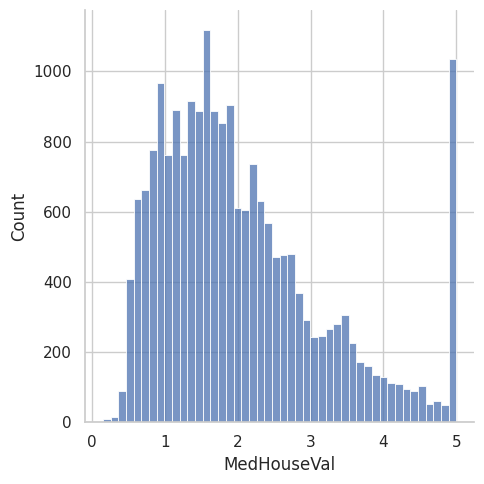

In [8]:
sns.displot(data=data, x="MedHouseVal")

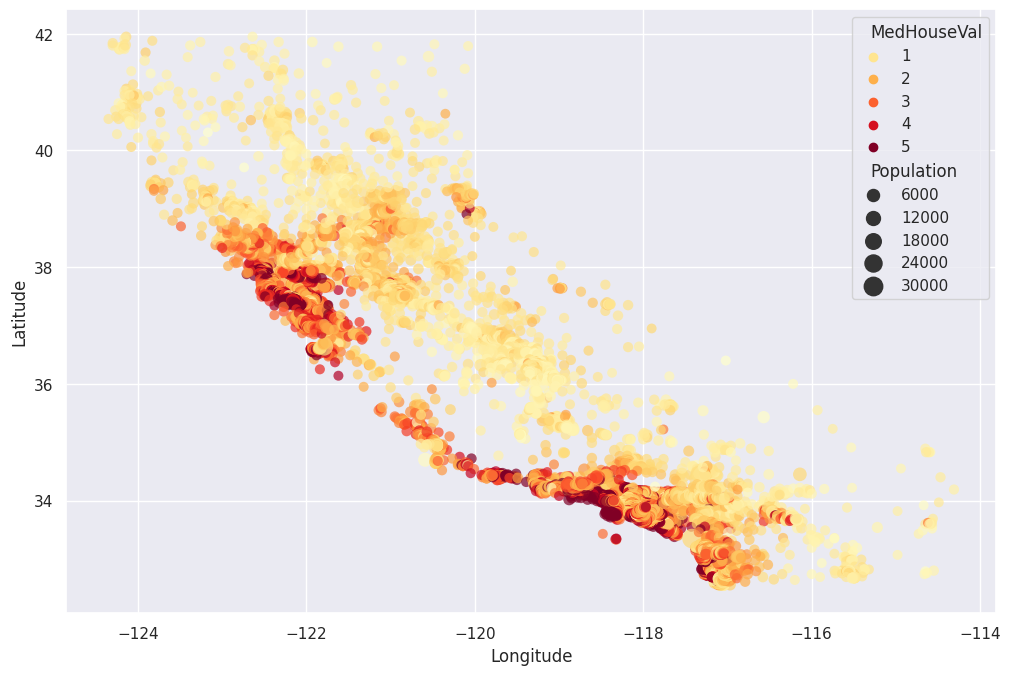

In [9]:
with sns.axes_style("darkgrid"):
    sns.scatterplot(
        data=data,
        x="Longitude",
        y="Latitude",
        size="Population",
        hue="MedHouseVal",
        palette="YlOrRd",
        alpha=0.7,
        sizes=(50, 200),
        linewidth=0,
    )

Text(0.5, 1.0, 'Locations of expensive housing')

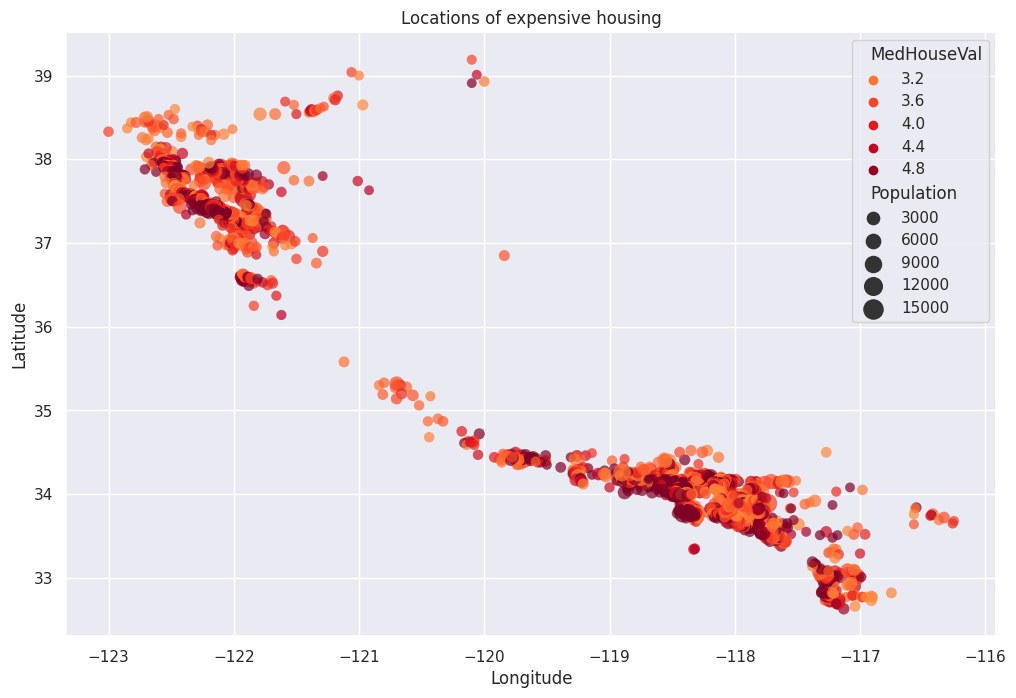

In [10]:
with sns.axes_style("darkgrid"):
    sns.scatterplot(
        data=data.loc[data["MedHouseVal"] > 3],
        x="Longitude",
        y="Latitude",
        size="Population",
        hue="MedHouseVal",
        hue_norm=(1, 5),
        palette="YlOrRd",
        alpha=0.7,
        sizes=(50, 200),
        linewidth=0,
    )

plt.title("Locations of expensive housing")

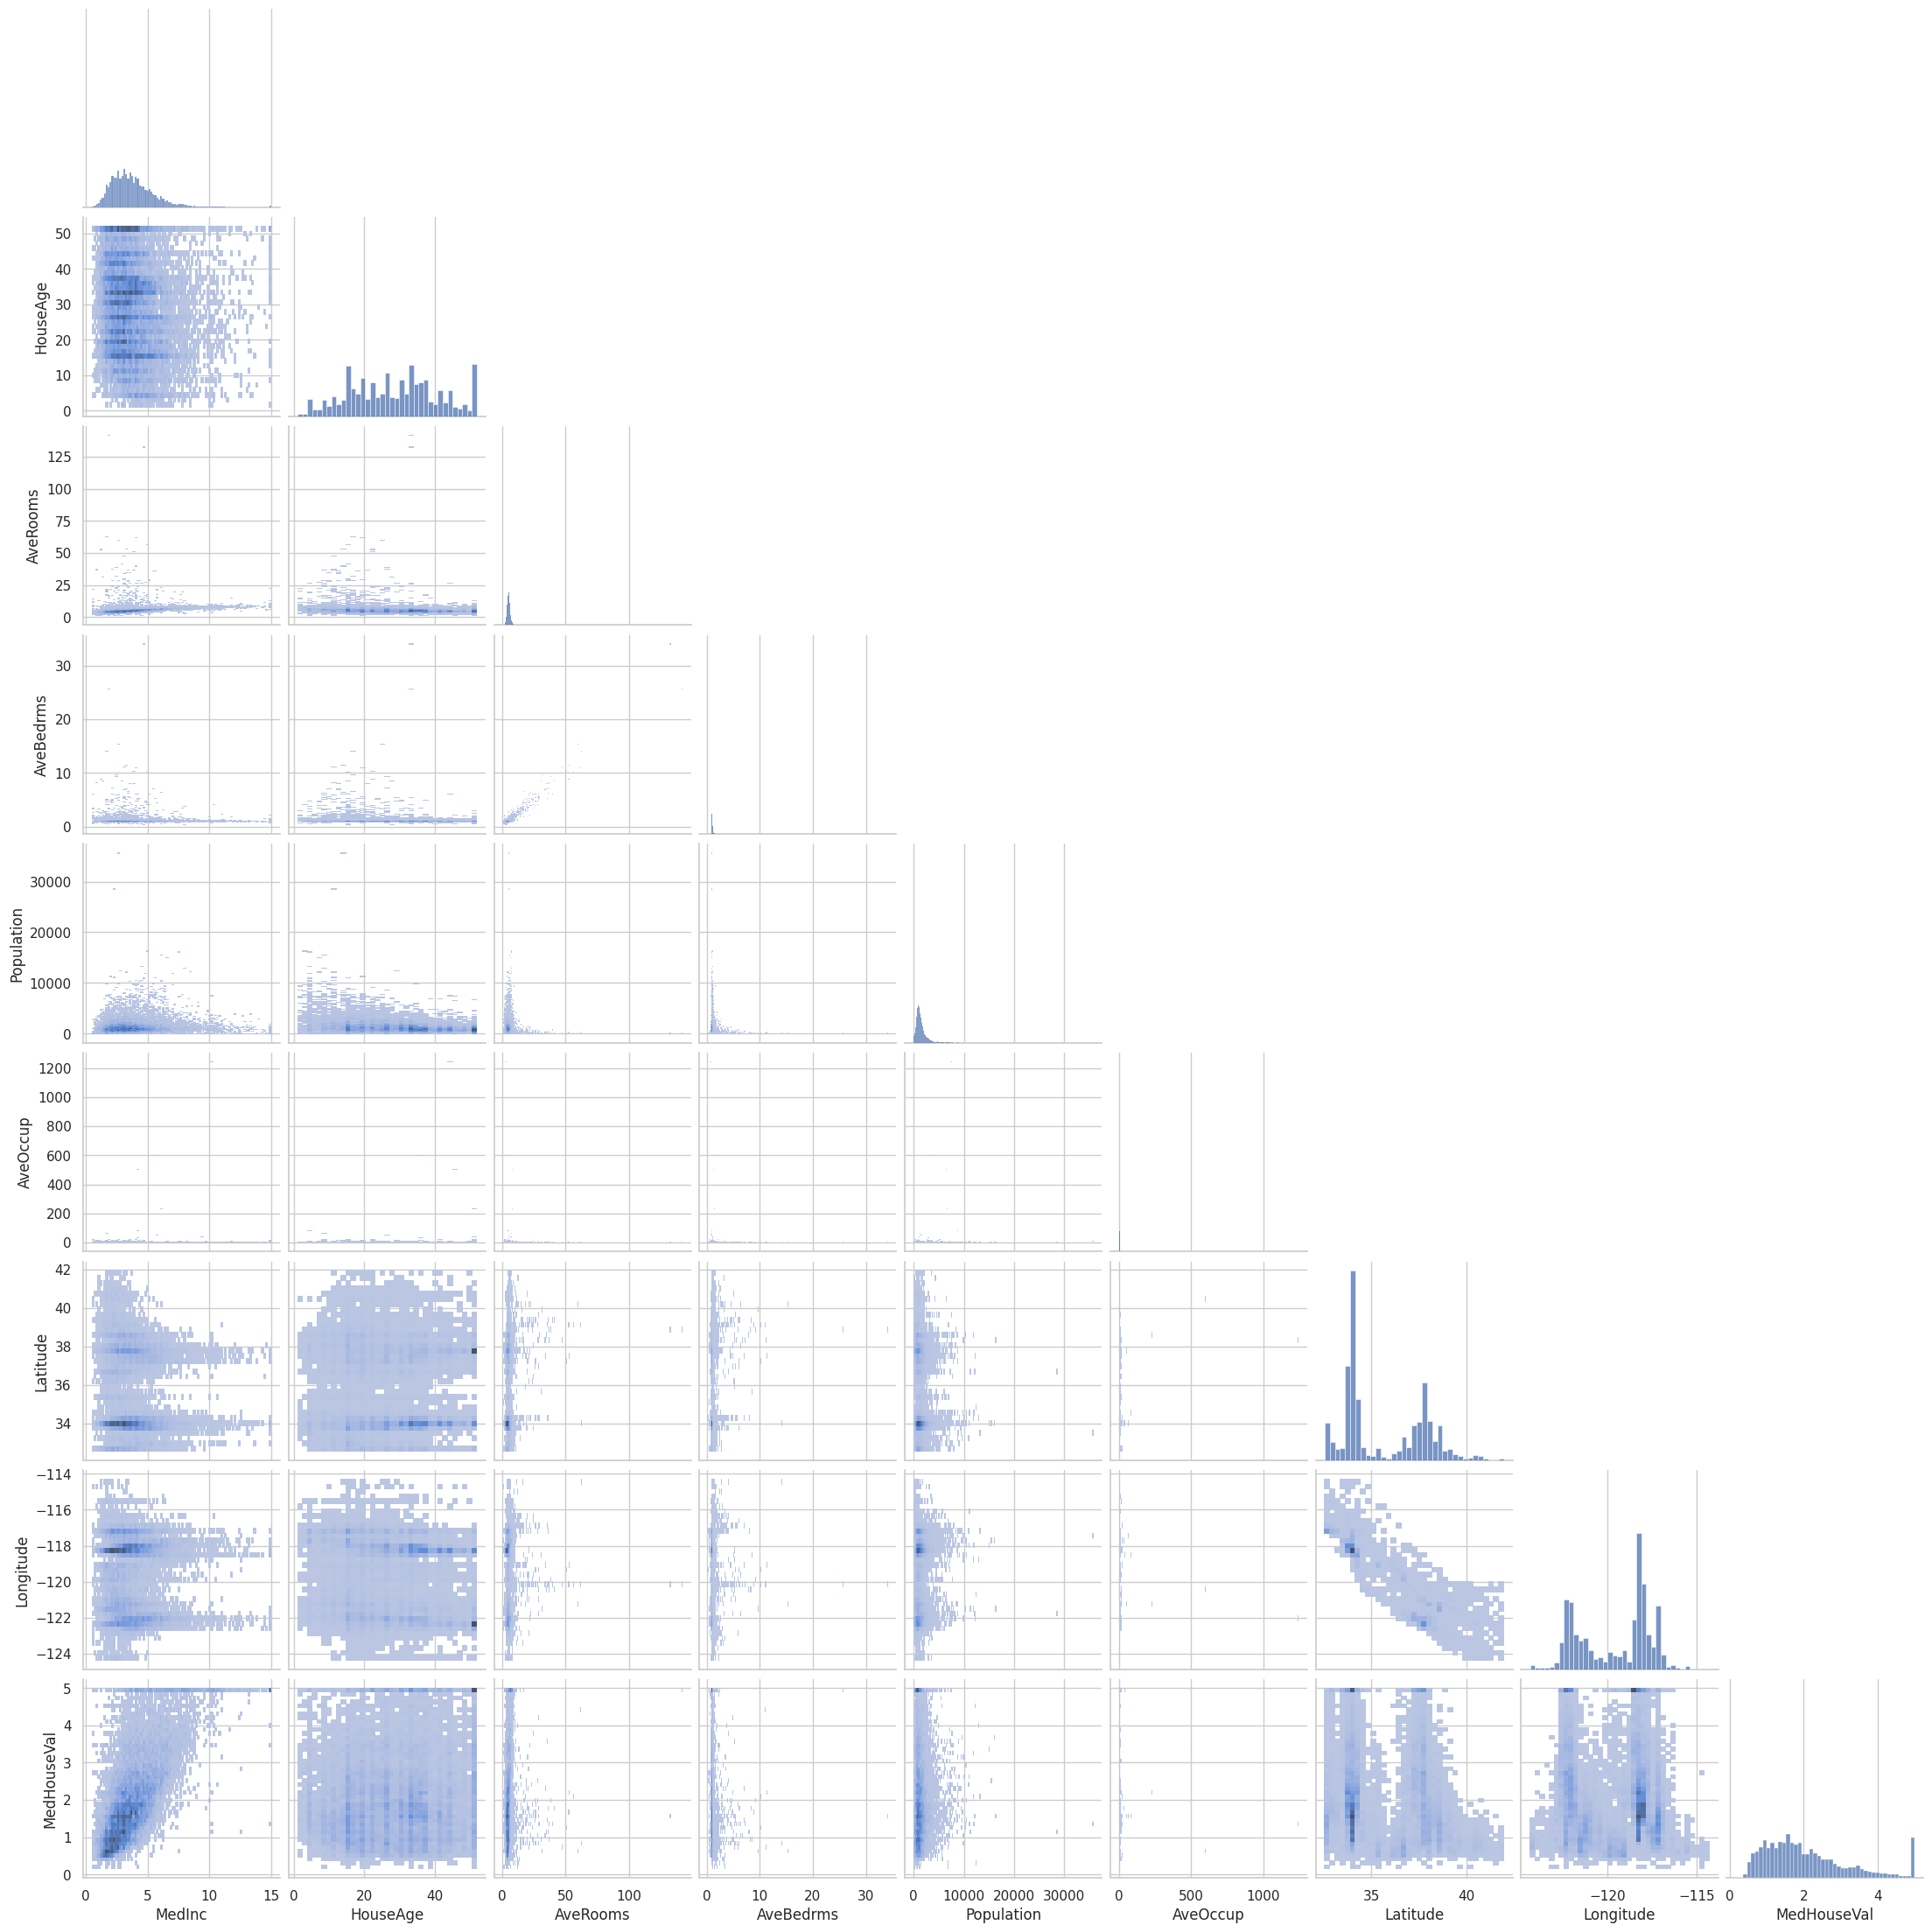

In [11]:
sns.pairplot(
    data=data,
    corner=True,
    kind="hist",
    diag_kind="hist",
)

In [12]:
def is_outlier(data, dimension):
    values = data[dimension]
    return np.logical_or(
        values < np.percentile(values, 5),
        values > np.percentile(values, 95)
    )

all_outliers = np.logical_or.reduce([is_outlier(data, column) for column in X.columns])
data_reduced = data.loc[np.logical_not(all_outliers)]

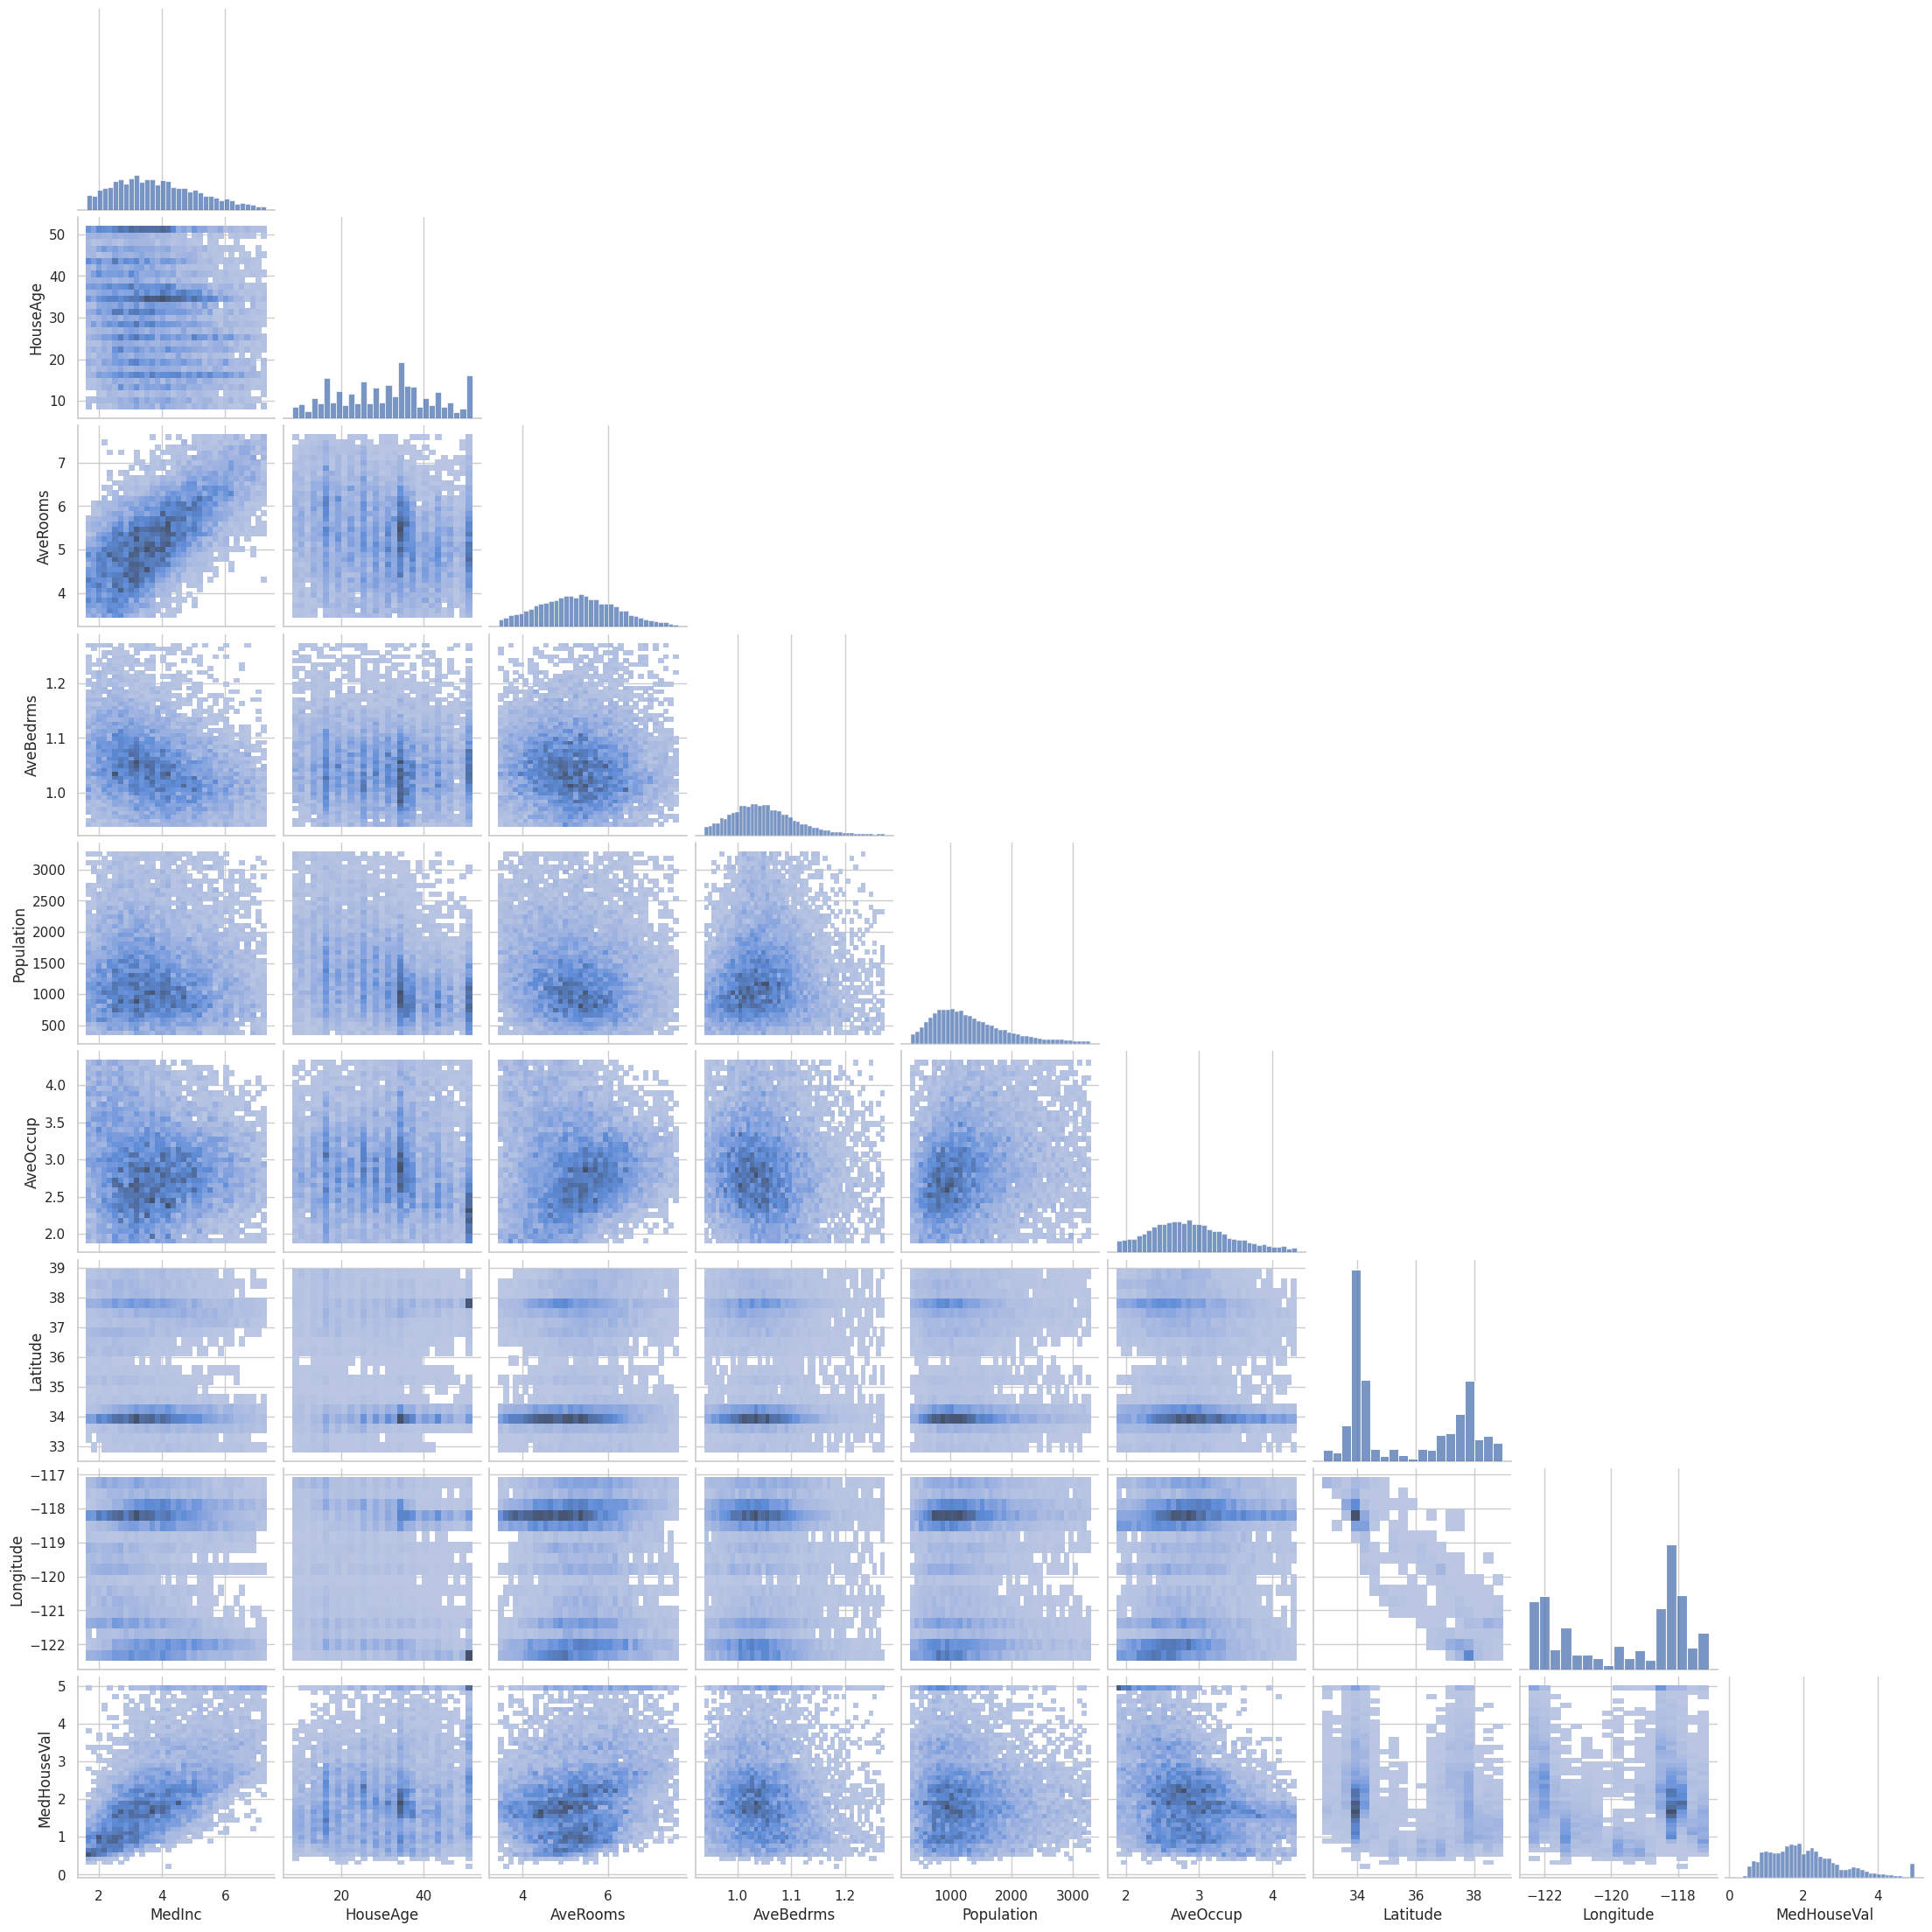

In [13]:
sns.pairplot(
    data=data_reduced,
    corner=True,
    kind="hist",
    diag_kind="hist",
)

## Baseline models

In [14]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(
    X, y, test_size=0.15, random_state=0
)

In [15]:
X_train

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
1316,3.5368,34.0,5.965142,1.034858,1316.0,2.867102,38.00,-121.80
14778,3.0273,12.0,4.706422,1.040367,1785.0,3.275229,32.58,-117.09
779,2.3750,26.0,6.480000,1.080000,86.0,3.440000,37.65,-122.12
5225,0.9889,40.0,3.611111,1.000000,1068.0,3.955556,33.93,-118.25
14838,2.0398,49.0,4.253012,1.054217,1200.0,3.614458,32.68,-117.10
...,...,...,...,...,...,...,...,...
13123,4.4125,20.0,6.000000,1.045662,712.0,3.251142,38.27,-121.26
19648,2.9135,27.0,5.349282,0.933014,647.0,3.095694,37.48,-120.89
9845,3.1977,31.0,3.641221,0.941476,704.0,1.791349,36.58,-121.90
10799,5.6315,34.0,4.540598,1.064103,1052.0,2.247863,33.62,-117.93


In [16]:
def transform_input(regressor):
    return sklearn.pipeline.make_pipeline(
        sklearn.preprocessing.RobustScaler(),
        regressor,
    )

def transform_target(regressor):
    return sklearn.compose.TransformedTargetRegressor(
        regressor=regressor,
        transformer=sklearn.preprocessing.RobustScaler(),
    )

In [17]:
baseline_models = {
    'mean_prediction': sklearn.dummy.DummyRegressor("mean"),
    'medinc_linear': sklearn.pipeline.make_pipeline(
            sklearn.compose.ColumnTransformer([
                ('selector', sklearn.preprocessing.RobustScaler(), ['MedInc'])
            ]),
            transform_target(sklearn.linear_model.LinearRegression()),
        ),
    'full_linear': transform_input(transform_target(sklearn.linear_model.LinearRegression())),
    'random_forest': sklearn.ensemble.RandomForestRegressor(),
}

/home/markus/repos/exploring-ml-problems-with-jupyter/.venv/lib/python3.9/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass strategy=mean as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


In [18]:
for name, model in baseline_models.items():
    model.fit(X_train, y_train)

<ipython-input-18-d175afa6981f>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


In [19]:
high_value_train = (y_train > 3).values[..., 0]
high_value_random_forest = sklearn.ensemble.RandomForestRegressor().fit(
    X_train.loc[high_value_train], y_train.loc[high_value_train]
)

baseline_models["high_value_random_forest"] = high_value_random_forest

<ipython-input-19-4811652a3fec>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  high_value_random_forest = sklearn.ensemble.RandomForestRegressor().fit(


In [20]:
for name, model in baseline_models.items():
    print(f"R2-value for model {name}: {model.score(X_test, y_test): .2f}")

R2-value for model mean_prediction: -0.00
R2-value for model medinc_linear:  0.45
R2-value for model full_linear:  0.60
R2-value for model random_forest:  0.80
R2-value for model high_value_random_forest: -1.95


## Model evaluation

In [21]:
baseline_predictions = pd.DataFrame({
    name: np.squeeze(model.predict(X_test))
    for name, model in baseline_models.items()
})

baseline_predictions["true"] = y_test.values

## Qualitative evaluation

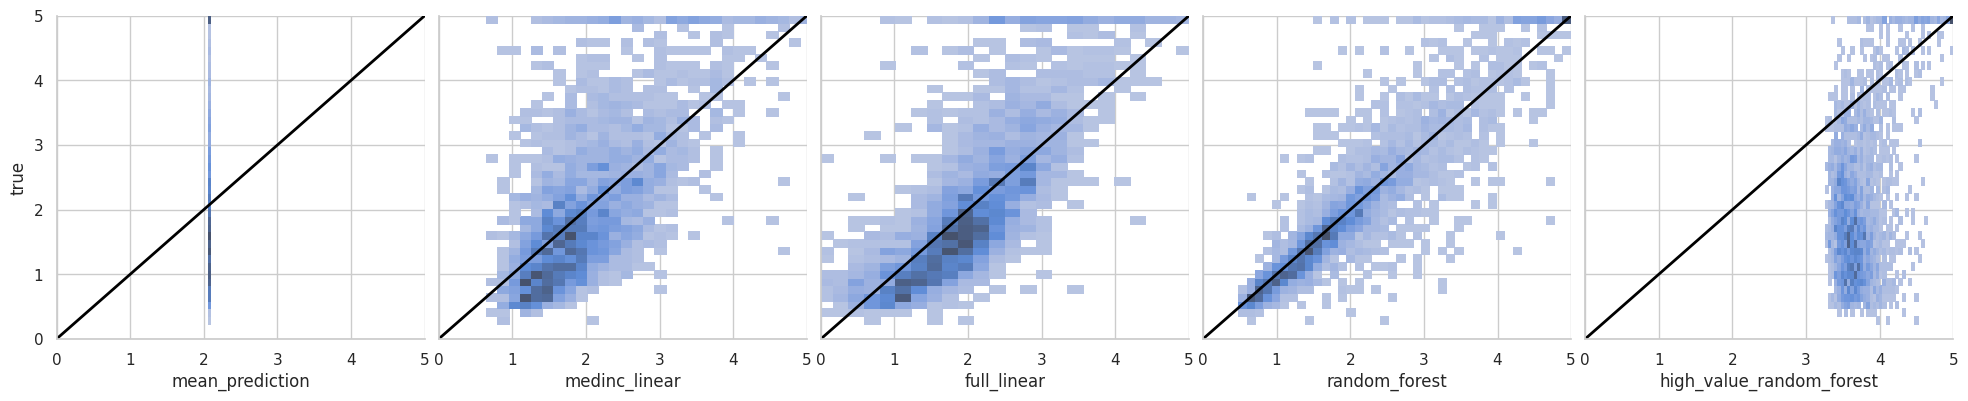

In [22]:
sns.pairplot(
    baseline_predictions,
    y_vars=["true"],
    x_vars=list(baseline_models),
    aspect=1,
    height=4,
    kind="hist",
    plot_kws=dict(bins=40),
).set(xlim=(0, 5), ylim=(0, 5)).map(lambda x, y, **kwargs: plt.plot(np.arange(6), c="black", linewidth=2))

## Quantitative evaluation

In [23]:
metrics = {
    'r2_score': sklearn.metrics.r2_score,
    'mean_absolute_error': sklearn.metrics.mean_absolute_error,
    'spearman_r': lambda y_true, y_pred: scipy.stats.spearmanr(
        np.squeeze(y_true.values),
        np.squeeze(y_pred),
    ).correlation,
}

In [24]:
baseline_evaluations = pd.DataFrame({
    metric_name: {
        model_name: metric(y_test, model.predict(X_test))
        for model_name, model in baseline_models.items()
    }
    for metric_name, metric in metrics.items()
})

baseline_evaluations

/home/markus/repos/exploring-ml-problems-with-jupyter/.venv/lib/python3.9/site-packages/scipy/stats/stats.py:4264: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


,r2_score,mean_absolute_error,spearman_r
mean_prediction,-0.000147,0.913535,NaN
medinc_linear,0.445550,0.637650,0.655724
full_linear,0.595058,0.535268,0.806079
random_forest,0.801737,0.330067,0.905223
high_value_random_forest,-1.947195,1.751462,0.140750


In [25]:
baseline_evaluations_tidy = baseline_evaluations.reset_index().melt(id_vars=["index"], var_name="metric").rename({"index": "model"}, axis=1)
baseline_evaluations_tidy

,model,metric,value
0,mean_prediction,r2_score,-0.000147
1,medinc_linear,r2_score,0.445550
2,full_linear,r2_score,0.595058
3,random_forest,r2_score,0.801737
4,high_value_random_forest,r2_score,-1.947195
5,mean_prediction,mean_absolute_error,0.913535
6,medinc_linear,mean_absolute_error,0.637650
7,full_linear,mean_absolute_error,0.535268
8,random_forest,mean_absolute_error,0.330067
9,high_value_random_forest,mean_absolute_error,1.751462


Text(0.5, 1.0, 'Metrics on full test-set')

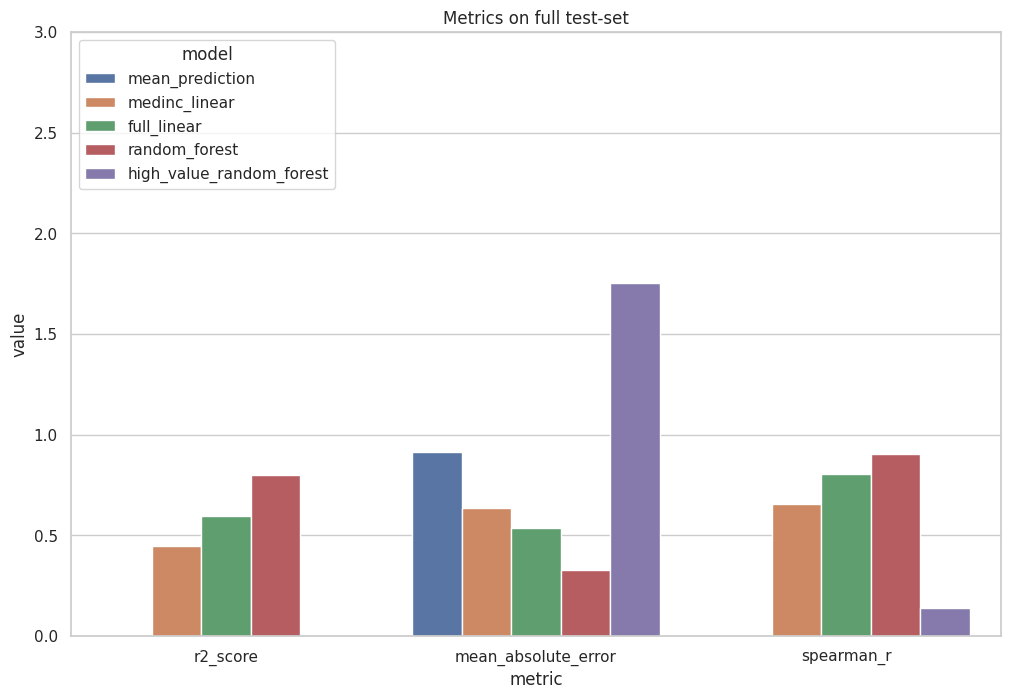

In [26]:
sns.barplot(data=baseline_evaluations_tidy, x="metric", y="value", hue="model")
plt.ylim(0, 3)
plt.title("Metrics on full test-set")

## Specialized metrics

/home/markus/repos/exploring-ml-problems-with-jupyter/.venv/lib/python3.9/site-packages/scipy/stats/stats.py:4264: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


Text(0.5, 1.0, 'Metrics on high-value test-set')

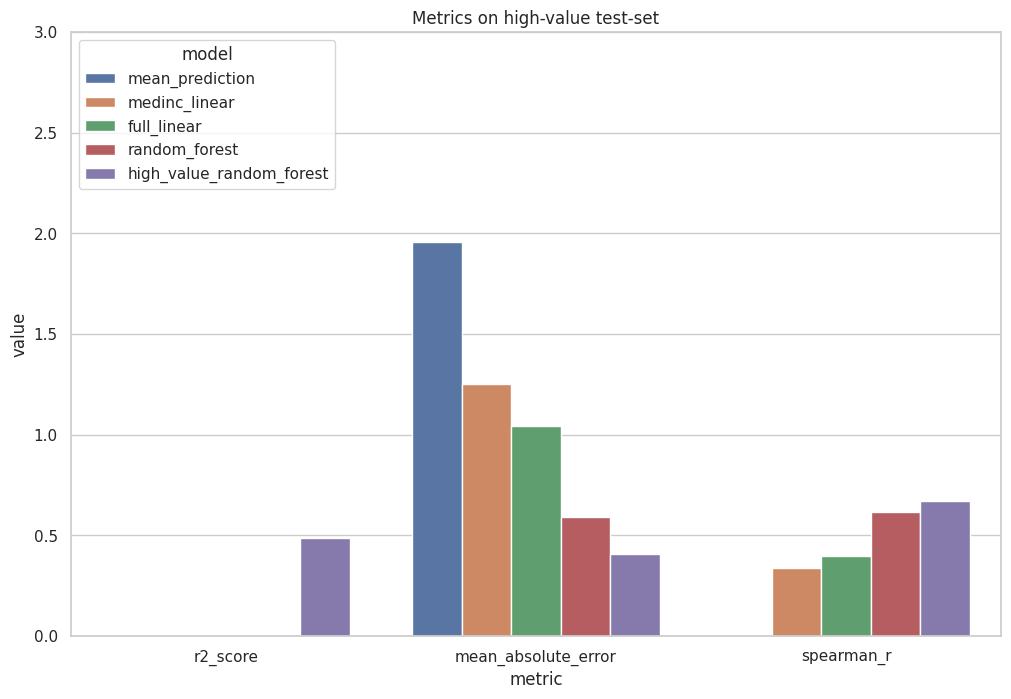

In [27]:
high_value_test = (y_test > 3).values[..., 0]

baseline_high_value_evaluations = pd.DataFrame({
    metric_name: {
        model_name: metric(y_test.loc[high_value_test], model.predict(X_test.loc[high_value_test]))
        for model_name, model in baseline_models.items()
    }
    for metric_name, metric in metrics.items()
})

baseline_high_value_evaluations = baseline_high_value_evaluations.reset_index().melt(id_vars=["index"], var_name="metric").rename({"index": "model"}, axis=1)

sns.barplot(data=baseline_high_value_evaluations, x="metric", y="value", hue="model")
plt.ylim(0, 3)
plt.title("Metrics on high-value test-set")

## Beat the Baseline!

Now is your turn!